In [1]:
import datetime
import json
import re
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pandas import DataFrame
import numpy as np
import numpy as nd
import numpy.ma as ma
from plotly.graph_objs import *
import  plotly.graph_objs as go
from datetime import datetime
import itertools
from datetime import timedelta

In [64]:
#conda install -c anaconda beautifulsoup4

In [65]:
def lat_lon_to_float(v):
    #Convert strings from NHC to float locations
    
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return(float(v[:-1]) * multiplier)

In [66]:
data = []

with open('hurdat2-1851-2021-041922.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            #create a list of the items sep ','
            storm_id = line.split(',')
            #select first item and strip white space
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(',')
            #strp is 'string parse'
            dt = datetime.strptime(location_line[0] + location_line[1], '%Y%m%d %H%M')
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_sust = location_line[6].strip()
            min_pres = location_line[7].strip()
            data.append([dt, storm_number, storm_name, storm_status, storm_lat, storm_lon, max_sust, min_pres])
        

In [6]:
hurdat2 = pd.DataFrame(data, columns=['date', 'storm_id', 'name', 'cat', 'lat', 'long', 'max_sust_windspeed(knots)', 'min_pressure(millibars)'])


In [7]:
hurdat2.to_csv('hurdat_all.csv', index=False)

## Start Here

In [67]:
hurdat2 = pd.read_csv('hurdat_all.csv')

In [68]:
def storm_Ident(NAME, YEAR, hurdat2):
    hurdat3 = hurdat2.loc[(hurdat2['name']==NAME) & (hurdat2['dates'].str[:4]==YEAR)]
    return((hurdat3.date.min(), hurdat3.date.max()))


In [69]:
#Validation function
def integerValidation(msg2 = "Input year: "):
    validAnswer = False
    while(not validAnswer):
        try:
            YEAR = int(input(msg2))
            if int(1851) <= YEAR <= int(2021):
                validAnswer = True
        except:
            print("This must be an integer number and between the range 1851 and 2021")
    return(YEAR)

In [70]:

#Validation function
def alphaValidation(names, msg = "Input Hurricane Name: "):
    validAnswer = False
    while(not validAnswer):
        NAME = (input(msg))
        NAME = NAME.upper()
        if NAME in names:
            validAnswer = True
            return(NAME)
        else:
            print("There is no record of this name in the database")
            validAnswer=False
    


In [71]:
#Applet for getting the Storm from Name and Year
hurdat2['dates'] = hurdat2.date.astype('str')
names = hurdat2.name.unique()
NAME = alphaValidation(names)
NAME = NAME.upper()
YEAR = str(integerValidation())
ranges = storm_Ident(NAME, YEAR, hurdat2)
print(ranges[0], ranges[1])

Input Hurricane Name: dorian
Input year: 2019
2019-08-24 06:00:00 2019-09-09 00:00:00


In [14]:
ranges=('20190901', '20190905')

In [15]:
df_ = pd.date_range(start= ranges[0], end= ranges[1], freq='D')
rng = df_.format(formatter=lambda x: x.strftime('%Y/%m/%d'))
rng2 = df_.format(formatter=lambda x: x.strftime('%Y_%m_%d'))
rng3 = list(zip(rng, rng2))

The code below draws down data from the magnetometers located in Alaska, for the period when Hurricane Dorian was active.

In [16]:

stations = ['eagle', 'fortyukon', 'gakona', 'kenai', 'poker']


In [61]:
start = "https://www.gi.alaska.edu/api/magnetometer/DATA/www/"

bs = "/"
us = "_"
end = ".csv.tar.gz"

frames = []

for i in rng3:
    for c in stations:
            url = start + i[0] + bs + c + bs + c + us + i[1] + end
            csv = urlopen(url)
            df = pd.read_csv(csv, compression='gzip', header=None, sep=',', on_bad_lines='skip')
            frames.append(df)
        except:
            continue

In [56]:
for i in frames:
    m = i[0][0]
    mags = m.split(',')
    station_id = mags[0].split('_')
    #select first item and strip white space
    station = station_id[0].strip()
    stat3 = station_id[3].strip()
    dt = datetime.strptime(station_id[1].strip() + station_id[2].strip() + stat3[:2] + '000000', '%Y%m%d%H%M%S')                
    dec_time = float(mags[1].strip())
    H = float(mags[2].strip())
    D = float(mags[3].strip())
    Z = float(mags[4].strip())
    data2.append([station, dt, dec_time, H, D, Z])
    print(m)

eagle_2019_09_01_23.csv
fortyukon_2019_09_01_21.csv
gakona_2019_09_01_00.csv
kenai_2019_09_01_00.csv
poker_2019_09_01_23.csv
eagle_2019_09_02_23.csv
fortyukon_2019_09_02_20.csv
gakona_2019_09_02_00.csv
kenai_2019_09_02_00.csv
poker_2019_09_02_23.csv
eagle_2019_09_03_23.csv
fortyukon_2019_09_03_20.csv
gakona_2019_09_03_00.csv
kenai_2019_09_03_00.csv
poker_2019_09_03_23.csv
eagle_2019_09_04_23.csv
fortyukon_2019_09_04_20.csv
gakona_2019_09_04_00.csv
kenai_2019_09_04_00.csv
poker_2019_09_04_23.csv
eagle_2019_09_05_23.csv
fortyukon_2019_09_05_22.csv
gakona_2019_09_05_00.csv
kenai_2019_09_05_00.csv
poker_2019_09_05_23.csv


In [ ]:
result = pd.concat(frames)

In [45]:
result.head()

,0,1,2,3,4
0,eagle_2019_09_01_23.csv,23.000000,12687.9656,-270.7750,54771.4625
1,23:00:01,23.000278,12688.4563,-270.5875,54771.4875
2,23:00:02,23.000556,12688.9938,-270.4125,54771.5531
3,23:00:03,23.000833,12689.5500,-270.2188,54771.5594
4,23:00:04,23.001111,12690.1688,-270.0719,54771.5750


In [46]:
result = result.dropna()
result.head()

,0,1,2,3,4
0,eagle_2019_09_01_23.csv,23.000000,12687.9656,-270.7750,54771.4625
1,23:00:01,23.000278,12688.4563,-270.5875,54771.4875
2,23:00:02,23.000556,12688.9938,-270.4125,54771.5531
3,23:00:03,23.000833,12689.5500,-270.2188,54771.5594
4,23:00:04,23.001111,12690.1688,-270.0719,54771.5750


In [47]:
result.columns = ['time', 'dec_time', 'H', 'D', 'Z']
result.head()

,time,dec_time,H,D,Z
0,eagle_2019_09_01_23.csv,23.000000,12687.9656,-270.7750,54771.4625
1,23:00:01,23.000278,12688.4563,-270.5875,54771.4875
2,23:00:02,23.000556,12688.9938,-270.4125,54771.5531
3,23:00:03,23.000833,12689.5500,-270.2188,54771.5594
4,23:00:04,23.001111,12690.1688,-270.0719,54771.5750


In [54]:
result['bool'] = False
result.loc[result['time'].isdecimal,'bool'] = True
result.head()

AttributeError: 'Series' object has no attribute 'isdecimal'

In order to process this data, it is more convenient to save it as a txt file.

In [20]:
result.to_csv('geomag3.txt', sep=',', header=None, index=False)

In [ ]:
#dfv = pd.read_csv('geomag2.txt')
#dfv.head()

In [37]:
options = ['00:00:00', '06:00:00', '12:00:00', '18:00:00']

data2 = []

with open('geomag3.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('ea') or line.startswith('fo') or line.startswith('ga') or line.startswith('ke') or line.startswith('po'):
            #create a list of the items sep ','
            mags = line.split(',')
            station_id = mags[0].split('_')
            #select first item and strip white space
            station = station_id[0].strip()
            stat3 = station_id[3].strip()
            dt = datetime.strptime(station_id[1].strip() + station_id[2].strip() + stat3[:2] + '000000', '%Y%m%d%H%M%S')                
            dec_time = float(mags[1].strip())
            H = float(mags[2].strip())
            D = float(mags[3].strip())
            Z = float(mags[4].strip())
            data2.append([station, dt, dec_time, H, D, Z])
        else:
            location_line = line.split(',')
            time = location_line[0].split(':')
            #strp is 'string parse'
            if location_line[0] in options:
                try:
                    dt1 = datetime.strptime(station_id[1].strip() + station_id[2].strip() + station_id[3].strip()[:2] + time[0].strip() + time[1].strip() + time[2].strip(), '%Y%m%d%H%M%S')
                except:
                    dt1 = datetime.strptime(station_id[1].strip() + station_id[2].strip() + station_id[3].strip()[:2] + time[0].strip() + time[1].strip() + '00', '%Y%m%d%H%M%S')
                dec_time = float(location_line[1].strip())
                H = float(location_line[2].strip())
                D = float(location_line[3].strip())
                Z = float(location_line[4].strip())
                data2.append([station, dt1, dec_time, H, D, Z])
            else:
                continue


AttributeError: 'int' object has no attribute 'startswith'

In [22]:
data2[0]

['eagle',
 datetime.datetime(2019, 9, 1, 0, 0),
 23.0,
 12687.9656,
 -270.775,
 54771.4625]

In [23]:
df2 = pd.DataFrame(data2, columns = ['station', 'date', 'dec_time', 'H', 'D', 'Z'])
df2.head()


,station,date,dec_time,H,D,Z
0,eagle,2019-09-01 00:00:00,23.0,12687.9656,-270.7750,54771.4625
1,eagle,2019-09-01 00:00:00,0.0,12664.8531,-311.8000,54759.7938
2,eagle,2019-09-01 06:00:00,6.0,12363.4469,-300.4156,54402.7281
3,eagle,2019-09-01 12:00:00,12.0,11080.5125,-552.9813,55025.2688
4,eagle,2019-09-01 18:00:00,18.0,12390.4969,-240.7406,54704.2313


In [24]:
df2.tail()

,station,date,dec_time,H,D,Z
114,poker,2019-09-05 00:00:00,7.0,12041.2469,-725.4750,54132.6781
115,poker,2019-09-05 00:00:00,0.0,12145.4250,-712.6781,54156.9813
116,poker,2019-09-05 06:00:00,6.0,12231.3625,-668.1562,54082.5250
117,poker,2019-09-05 12:00:00,12.0,12106.7250,-697.2969,54049.3250
118,poker,2019-09-05 18:00:00,18.0,12144.8219,-681.6250,54146.2031


In [25]:
df2.dtypes

station             object
date        datetime64[ns]
dec_time           float64
H                  float64
D                  float64
Z                  float64
dtype: object

To get the total value of the magnetic field, it is necessary to take the square root of the sum of the squares of the magnetic coordinates H, D, Z.

In [26]:
import math
df2['M'] = np.sqrt((df2.H**2)+(df2.D**2)+(df2.Z**2))
df2.head()

,station,date,dec_time,H,D,Z,M
0,eagle,2019-09-01 00:00:00,23.0,12687.9656,-270.7750,54771.4625,56222.512347
1,eagle,2019-09-01 00:00:00,0.0,12664.8531,-311.8000,54759.7938,56206.145040
2,eagle,2019-09-01 06:00:00,6.0,12363.4469,-300.4156,54402.7281,55790.697195
3,eagle,2019-09-01 12:00:00,12.0,11080.5125,-552.9813,55025.2688,56132.555189
4,eagle,2019-09-01 18:00:00,18.0,12390.4969,-240.7406,54704.2313,56090.420676


To get a better estimate of the Earth's magnetic field, it is necessary to take the average of the readings from the 5 stations. However, it is apparent that there are differences between the number of observation between the different stations.

In [27]:
stations = ['eagle', 'fortyukon', 'gakona', 'kenai', 'poker']

for i in stations:
    dfk = df2.loc[df2['station']==i]
    print(dfk.shape)

(25, 7)
(26, 7)
(22, 7)
(20, 7)
(26, 7)


In [28]:
#identify duplicate rows
duplicateRows = df2[df2.duplicated()]

#view duplicate rows
duplicateRows

,station,date,dec_time,H,D,Z,M
78,fortyukon,2019-09-04,0.0,11270.5312,203.1656,54769.0906,55917.076416


In [29]:
df2.shape

(119, 7)

In [30]:
df2 = df2.drop_duplicates()
df2.shape

(118, 7)

After duplicate rows are removed the length of the different datasets for each station are more even, but not completely so. This suggests that the timing of the dataframes are not totally aligned somehow. However, since we are taking an average based on time, this misalignment should not cause a problem.

In [32]:
stations = ['eagle', 'fortyukon', 'gakona', 'kenai', 'poker']

for i in stations:
    dfk = df2.loc[df2['station']==i]
    print(dfk.shape)

(25, 7)
(25, 7)
(22, 7)
(20, 7)
(26, 7)


In [34]:
cols = ['station']
df4 = df2.drop(cols, axis=1)

In [35]:
df5 = df4.groupby('date').mean()
df5.head()

,dec_time,H,D,Z,M
date,,,,,
2019-09-01 00:00:00,8.375000,12824.369913,102.121100,54166.492600,55697.225583
2019-09-01 06:00:00,6.000000,13166.701260,341.249380,53726.941240,55364.574831
2019-09-01 12:00:00,12.000000,12186.716260,-10.039380,53951.993140,55369.905969
2019-09-01 18:00:00,18.000000,13084.516260,363.845020,53880.073140,55492.730673
2019-09-02 00:00:00,7.444444,12917.238200,398.679178,54138.916344,55696.435167


Our final dataset for the magnetic fields with all 5 stations averaged.

In [36]:
df5 = df5.reset_index()
df5.head()

,date,dec_time,H,D,Z,M
0,2019-09-01 00:00:00,8.375000,12824.369913,102.121100,54166.492600,55697.225583
1,2019-09-01 06:00:00,6.000000,13166.701260,341.249380,53726.941240,55364.574831
2,2019-09-01 12:00:00,12.000000,12186.716260,-10.039380,53951.993140,55369.905969
3,2019-09-01 18:00:00,18.000000,13084.516260,363.845020,53880.073140,55492.730673
4,2019-09-02 00:00:00,7.444444,12917.238200,398.679178,54138.916344,55696.435167


In [26]:
test = ['1', '2', '3']

u = input()
if u in test:
    print('True')
else:
    print('False')

4
False


In [28]:
df5.to_csv('magnetic_alaska.csv', index=False)

## Test run for the above code.

In [165]:
url = 'https://www.gi.alaska.edu/api/magnetometer/DATA/www/2019/08/24/kenai/kenai_2019_08_24.csv.tar.gz'
csv = urlopen(url)

df = pd.read_csv(csv, compression='gzip', header=None, sep=',', on_bad_lines='skip')

In [166]:
df.head()

,0,1,2,3,4
0,kenai_2019_08_24_00.csv,0.000000,16097.4875,-347.7219,52090.6750
1,00:00:01,0.000278,16097.6719,-348.2281,52090.6000
2,00:00:02,0.000556,16097.9656,-349.0500,52090.5063
3,00:00:03,0.000833,16097.7812,-348.3438,52090.5688
4,00:00:04,0.001111,16098.0094,-348.7625,52090.4719


In [167]:
df[1:].dtypes

0     object
1    float64
2    float64
3    float64
4    float64
dtype: object

In [43]:
df[1198:2065]

,0,1,2,3,4
1198,23:19:57,23.332500,12158.9188,-720.0844,54163.9656
1199,23:19:58,23.332778,12158.9938,-720.1156,54163.9531
1200,23:19:59,23.333056,12159.0125,-720.1563,54163.9594
1201,23:20:00,23.333333,12159.1063,-720.1500,54163.9625
1202,23:20:01,23.333611,12159.1594,-720.1219,54163.9781
...,...,...,...,...,...
2060,23:34:19,23.571944,12158.4344,-725.1656,54168.7125
2061,23:34:20,23.572222,12158.3781,-725.1844,54168.7281
2062,23:34:21,23.572500,12158.3313,-725.1875,54168.7938
2063,23:34:22,23.572778,12158.2688,-725.2313,54168.8313


In [ ]:
datetime.strptime(df[], '%Y%m%d')

In [133]:
df.columns = ['time', 'decimal_time', 'H', 'D', 'Z']
df

,time,decimal_time,H,D,Z
0,kenai_2019_08_24_00.csv,0.000000,16097.4875,-347.7219,52090.6750
1,00:00:01,0.000278,16097.6719,-348.2281,52090.6000
2,00:00:02,0.000556,16097.9656,-349.0500,52090.5063
3,00:00:03,0.000833,16097.7812,-348.3438,52090.5688
4,00:00:04,0.001111,16098.0094,-348.7625,52090.4719
...,...,...,...,...,...
172842,23:59:56,23.998889,16103.4844,-351.4844,52091.3625
172843,23:59:57,23.999167,16103.4531,-351.4500,52091.3719
172844,23:59:58,23.999444,16103.4750,-351.4438,52091.3969
172845,23:59:59,23.999722,16103.5406,-351.5063,52091.4094


In [168]:
df = df.dropna()
df

,0,1,2,3,4
0,kenai_2019_08_24_00.csv,0.000000,16097.4875,-347.7219,52090.6750
1,00:00:01,0.000278,16097.6719,-348.2281,52090.6000
2,00:00:02,0.000556,16097.9656,-349.0500,52090.5063
3,00:00:03,0.000833,16097.7812,-348.3438,52090.5688
4,00:00:04,0.001111,16098.0094,-348.7625,52090.4719
...,...,...,...,...,...
172841,23:59:55,23.998611,16103.5594,-351.8031,52091.3219
172842,23:59:56,23.998889,16103.4844,-351.4844,52091.3625
172843,23:59:57,23.999167,16103.4531,-351.4500,52091.3719
172844,23:59:58,23.999444,16103.4750,-351.4438,52091.3969


In [140]:
station = []
for i in df.time:
    c = i[:2]
    x = c.isnumeric()
    station.append(x)
    
df['station'] = station
df.head()

/opt/anaconda3/envs/voila2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,time,decimal_time,H,D,Z,station
0,kenai_2019_08_24_00.csv,0.000000,16097.4875,-347.7219,52090.6750,False
1,00:00:01,0.000278,16097.6719,-348.2281,52090.6000,True
2,00:00:02,0.000556,16097.9656,-349.0500,52090.5063,True
3,00:00:03,0.000833,16097.7812,-348.3438,52090.5688,True
4,00:00:04,0.001111,16098.0094,-348.7625,52090.4719,True


In [30]:
df.to_csv('geomag.txt', sep=',', header=None, index=False)  

NameError: name 'df' is not defined

In [31]:
data1 = []

with open('geomag.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('ea') or line.startswith('fo') or line.startswith('ga') or line.startswith('ke') or line.startswith('po'):
            #create a list of the items sep ','
            mags = line.split(',')
            station_id = mags[0].split('_')
            #select first item and strip white space
            station = station_id[0].strip()
            dt = datetime.strptime(station_id[1].strip() + station_id[2].strip() + station_id[3].strip() + '00' + '00' + '00', '%Y%m%d%H%M%S')
            dec_time = mags[1].strip()
            H = mags[2].strip()
            D = mags[3].strip()
            Z = mags[4].strip()
            data1.append([station, dt, dec_time, H, D, Z])
        else:
            location_line = line.split(',')
            time = location_line[0].split(':')
            #strp is 'string parse'
            dt1 = datetime.strptime(station_id[1].strip() + station_id[2].strip() + station_id[3].strip() + time[0].strip() + time[1].strip() + time[2].strip(), '%Y%m%d%H%M%S')
            dec_time = location_line[1].strip()
            H = location_line[2].strip()
            D = location_line[3].strip()
            Z = location_line[4].strip()
            data1.append([station, dt1, dec_time, H, D, Z])

In [32]:
data1[0]

['kenai',
 datetime.datetime(2019, 8, 24, 0, 0),
 '0.0',
 '16097.4875',
 '-347.7219',
 '52090.675']

In [33]:
df1 = pd.DataFrame(data1, columns = ['station', 'date', 'dec_time', 'H', 'D', 'Z'])
df1.head()

,station,date,dec_time,H,D,Z
0,kenai,2019-08-24 00:00:00,0.0,16097.4875,-347.7219,52090.675
1,kenai,2019-08-24 00:00:01,0.000278,16097.6719,-348.2281,52090.6
2,kenai,2019-08-24 00:00:02,0.000556,16097.9656,-349.05,52090.5063
3,kenai,2019-08-24 00:00:03,0.000833,16097.7812,-348.3438,52090.5688
4,kenai,2019-08-24 00:00:04,0.001111,16098.0094,-348.7625,52090.4719


In [177]:
df1.tail()

,station,date,dec_time,H,D,Z
172817,kenai,2019-08-24 23:59:55,23.998611,16103.5594,-351.8031,52091.3219
172818,kenai,2019-08-24 23:59:56,23.998889,16103.4844,-351.4844,52091.3625
172819,kenai,2019-08-24 23:59:57,23.999167,16103.4531,-351.45,52091.3719
172820,kenai,2019-08-24 23:59:58,23.999444,16103.475,-351.4438,52091.3969
172821,kenai,2019-08-24 23:59:59,23.999722,16103.5406,-351.5063,52091.4094


In [178]:
df1.station.unique()

array(['kenai'], dtype=object)

In [56]:
k = []
for  t in df.decimal_time:
    h = t
    m = (t*60)%60
    s = (t*3600)%60
    k.append('%d:%02d:%02d' % (h, m, s))
    
df.time=k
df

/opt/anaconda3/envs/voila2/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,time,decimal_time,H,D,Z
0,23:00:00,23.000000,12147.6750,-720.5313,54155.9375
1,23:00:01,23.000278,12147.7656,-720.4875,54155.9531
2,23:00:02,23.000556,12147.8563,-720.4281,54155.9844
3,23:00:02,23.000833,12147.9188,-720.3469,54155.9656
4,23:00:03,23.001111,12147.9750,-720.2500,54156.0000
...,...,...,...,...,...
172841,22:59:54,22.998611,12146.9125,-720.5375,54155.9313
172842,22:59:56,22.998889,12147.0750,-720.5906,54155.9000
172843,22:59:57,22.999167,12147.2156,-720.6281,54155.9062
172844,22:59:57,22.999444,12147.3125,-720.6531,54155.9219


In [60]:
import math
df['M'] = np.sqrt((df.H**2)+(df.D**2)+(df.Z**2))
df

/opt/anaconda3/envs/voila2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,decimal_time,H,D,Z,M
0,23:00:00,23.000000,12147.6750,-720.5313,54155.9375,55506.312612
1,23:00:01,23.000278,12147.7656,-720.4875,54155.9531,55506.347092
2,23:00:02,23.000556,12147.8563,-720.4281,54155.9844,55506.396709
3,23:00:02,23.000833,12147.9188,-720.3469,54155.9656,55506.390991
4,23:00:03,23.001111,12147.9750,-720.2500,54156.0000,55506.435597
...,...,...,...,...,...,...
172841,22:59:54,22.998611,12146.9125,-720.5375,54155.9313,55506.139773
172842,22:59:56,22.998889,12147.0750,-720.5906,54155.9000,55506.145486
172843,22:59:57,22.999167,12147.2156,-720.6281,54155.9062,55506.182791
172844,22:59:57,22.999444,12147.3125,-720.6531,54155.9219,55506.219640


In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:

year = 2019
month = 'August'
day = 31

url = "https://www.gi.alaska.edu/api/magnetometer/DATA/www/"+str(year)+"/" + month + "/"+ str(day)"/eagle/eagle_" + str(year) + "_" + str(month) + "_" + str(day) + ".csv"

csv = urlopen(url)

df = pd.DataFrame(csv)
df


ValueError: unknown url type: '/api/magnetometer/DATA/www/2022/06/19/eagle/eagle_2019_August_31.csv'

## Hurricane dataset

In [93]:
hdat = pd.read_csv('hurdat2-1851-2021-041922.csv', header=None, sep=',', on_bad_lines='skip')
hdat.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
2,18510625,600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN


In [94]:
cols = ['date',' time(UTC)', 'record_id', 'record_id2', 'lat', 'N/S', 'long', 'E/W', 'max_sust_windspeed(knots)',  'min_pressure(millibars)', '34-kt_wind_radi_NE(naut_miles)', '34-kt_wind_radi_SE', '34-kt_wind_radi_SW', '34-kt_wind_radi_NW', '50-kt_wind_radi_NE', '50-kt_wind_radi_SE', '50-kt_wind_radi_SW', '50-kt_wind_radi_NW', '64-kt_wind_radi_NE', '64-kt_wind_radi_SE', '64-kt_wind_radi_SW', '64-kt_wind_radi_NW']
hdat.columns = cols
hdat.head()

,date,time(UTC),record_id,record_id2,lat,N/S,long,E/W,max_sust_windspeed(knots),min_pressure(millibars),...,34-kt_wind_radi_SW,34-kt_wind_radi_NW,50-kt_wind_radi_NE,50-kt_wind_radi_SE,50-kt_wind_radi_SW,50-kt_wind_radi_NW,64-kt_wind_radi_NE,64-kt_wind_radi_SE,64-kt_wind_radi_SW,64-kt_wind_radi_NW
0,AL011851,UNNAMED,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18510625,0,,HU,28.0N,94.8W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
2,18510625,600,,HU,28.0N,95.4W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
3,18510625,1200,,HU,28.0N,96.0W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN
4,18510625,1800,,HU,28.1N,96.5W,80.0,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,NaN


Attempt at recreating distance fucntion from java code found online. Attempt failed.

In [92]:

class LatLonNvectorSpherical():
    
    def __init__(self, lat1, long1, lat2, long2):
        self.lat1 = lat1
        self.long1 = long1
        self.lat2 = lat2
        self.long2 = long2
        
    def toRadians(self, this):
        rads = this * (math.pi*180)
        return(rads)
        
        
     # Converts ‘this’ latitude/longitude point to an n-vector (normal to earth's surface).
     #
     # @returns {Nvector} Normalised n-vector representing lat/lon point.
     #
     # @example
     #   const p = new LatLon(45, 45);
     #   const v = p.toNvector();      // [0.5000,0.5000,0.7071]
     
    def toNvector(self, lat, long):
        theta = self.toRadians(lat)
        lambd = self.toRadians(long)

        stheta = math.sin(theta)
        ctheta = math.cos(theta)
        slambd = math.sin(lambd)
        clambd = math.cos(lambd)

        # right-handed vector: x -> 0°E,0°N; y -> 90°E,0°N, z -> 90°N
        x = ctheta * clambd
        y = ctheta * slambd
        z = stheta

        return (x, y, z)

    
     # Returns the distance on the surface of the sphere from ‘this’ point to destination point.
    
     # @param   {LatLon}    point - Latitude/longitude of destination point.
     # @param   {number}    [radius=6371e3] - Radius of earth (defaults to mean radius in metres).
     # @returns {number}    Distance between this point and destination point, in same units as radius.
     # @throws  {TypeError} Invalid point/radius.
     
     # @example
     #   const p1 = new LatLon(52.205, 0.119);
     #   const p2 = new LatLon(48.857, 2.351);
     #   const d = p1.distanceTo(p2);          // 404.3 km

    def distanceTo(self):
        radius=6371e3
        
        R = int(radius)

        n1 = self.toNvector(self.lat1, self.long1)
        n2 = self.toNvector(self.lat2, self.long2)

        stheta = len(np.cross(n1, n2))
        ctheta = np.dot(n1, n2)
        delta = math.atan2(stheta, ctheta) # tanδ = |n₁×n₂| / n₁⋅n₂

        return(delta * R)

In [93]:
p1 = LatLonNvectorSpherical(52.205, 0.119, 48.857, 2.351)

In [94]:
p1.distanceTo()

10535815.13877682

In [96]:
math.radians(48.857)

NameError: name 'radians' is not defined

Better, more correct version of above.

In [95]:
points = ((52.205, 0.119), (48.857, 2.351))

def get_distance(pair):
    R = 6370
    point1 = pair[0]
    point2 = pair[1]
    lat1 = math.radians(point1[0])  #insert value
    lon1 = math.radians(point1[1])
    lat2 = math.radians(point2[0])
    lon2 = math.radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return(distance)

In [35]:
test = get_distance(points)
test

404.2157078336033

In [96]:
def lat_lon_to_float(v):
    #Convert strings from NHC to float locations
    
    if (v[-1] == 'S') or (v[-1] == 'W'):
        multiplier = -1
    else:
        multiplier = 1
    return(float(v[:-1]) * multiplier)

Process Hurricane data

In [97]:
data = []

with open('hurdat2-1851-2021-041922.txt', 'r') as f:
    for line in f.readlines():
        if line.startswith('AL'):
            #create a list of the items sep ','
            storm_id = line.split(',')
            #select first item and strip white space
            storm_number = storm_id[0].strip()
            storm_name = storm_id[1].strip()
        else:
            location_line = line.split(',')
            #strp is 'string parse'
            dt = datetime.strptime(location_line[0] + location_line[1], '%Y%m%d %H%M')
            storm_status = location_line[3].strip()
            storm_lat = lat_lon_to_float(location_line[4].strip())
            storm_lon = lat_lon_to_float(location_line[5].strip())
            max_sust = location_line[6].strip()
            min_pres = location_line[7].strip()
            data.append([dt, storm_number, storm_name, storm_status, storm_lat, storm_lon, max_sust, min_pres])
        

In [98]:
data[0]

[datetime.datetime(1851, 6, 25, 0, 0),
 'AL011851',
 'UNNAMED',
 'HU',
 28.0,
 -94.8,
 '80',
 '-999']

In [99]:
hurdat2 = pd.DataFrame(data, columns=['date', 'storm_id', 'name', 'cat', 'lat', 'long', 'max_sust_windspeed(knots)', 'min_pressure(millibars)'])



In [100]:
hurdat2.head()


,date,storm_id,name,cat,lat,long,max_sust_windspeed(knots),min_pressure(millibars)
0,1851-06-25 00:00:00,AL011851,UNNAMED,HU,28.0,-94.8,80,-999
1,1851-06-25 06:00:00,AL011851,UNNAMED,HU,28.0,-95.4,80,-999
2,1851-06-25 12:00:00,AL011851,UNNAMED,HU,28.0,-96.0,80,-999
3,1851-06-25 18:00:00,AL011851,UNNAMED,HU,28.1,-96.5,80,-999
4,1851-06-25 21:00:00,AL011851,UNNAMED,HU,28.2,-96.8,80,-999


In [57]:
hurdat2.to_csv('hurdat2_MOD.csv', index=False)

Merging the geomagnetic and hurricane data

In [101]:
df6 = pd.merge(hurdat2, df5, on='date')
df6.head()

,date,storm_id,name,cat,lat,long,max_sust_windspeed(knots),min_pressure(millibars),dec_time,H,D,Z,M
0,2005-08-04 00:00:00,AL082005,HARVEY,TS,31.3,-66.4,50,997,0.0,12316.103125,-71.595325,54850.841400,56227.642290
1,2005-08-04 06:00:00,AL082005,HARVEY,TS,31.6,-65.0,50,995,6.0,12424.821125,-28.485150,54916.058625,56314.219674
2,2005-08-04 12:00:00,AL082005,HARVEY,TS,31.9,-63.6,50,995,12.0,12272.562500,-41.607025,54810.760175,56179.645382
3,2005-08-04 18:00:00,AL082005,HARVEY,TS,32.0,-62.1,55,994,18.0,12315.757825,-8.232800,54822.339850,56199.663107
4,2005-08-04 18:00:00,AL092005,IRENE,TD,12.9,-33.5,25,1009,18.0,12315.757825,-8.232800,54822.339850,56199.663107


In [102]:
df6.name.unique()

array(['HARVEY', 'IRENE', 'TEN'], dtype=object)

Selecting Hurricane Dorian only.

In [103]:
df7 = df6.loc[df6['name']=='IRENE']
df7.head()

,date,storm_id,name,cat,lat,long,max_sust_windspeed(knots),min_pressure(millibars),dec_time,H,D,Z,M
4,2005-08-04 18:00:00,AL092005,IRENE,TD,12.9,-33.5,25,1009,18.0,12315.757825,-8.232800,54822.339850,56199.663107
6,2005-08-05 00:00:00,AL092005,IRENE,TD,13.6,-34.5,25,1009,2.0,12315.851880,-43.331240,54792.318140,56168.243833
8,2005-08-05 06:00:00,AL092005,IRENE,TD,14.6,-35.5,25,1009,6.0,12337.089075,-36.189825,54866.171875,56247.001362
10,2005-08-05 12:00:00,AL092005,IRENE,TD,15.6,-36.8,30,1008,12.0,12308.374250,-46.788275,54861.308600,56236.370207
12,2005-08-05 18:00:00,AL092005,IRENE,TD,16.6,-38.4,30,1008,18.0,12204.407050,3.149250,54761.448450,56116.861397


In [104]:
df7.reset_index(drop=True, inplace=True)
df7.head()

,date,storm_id,name,cat,lat,long,max_sust_windspeed(knots),min_pressure(millibars),dec_time,H,D,Z,M
0,2005-08-04 18:00:00,AL092005,IRENE,TD,12.9,-33.5,25,1009,18.0,12315.757825,-8.232800,54822.339850,56199.663107
1,2005-08-05 00:00:00,AL092005,IRENE,TD,13.6,-34.5,25,1009,2.0,12315.851880,-43.331240,54792.318140,56168.243833
2,2005-08-05 06:00:00,AL092005,IRENE,TD,14.6,-35.5,25,1009,6.0,12337.089075,-36.189825,54866.171875,56247.001362
3,2005-08-05 12:00:00,AL092005,IRENE,TD,15.6,-36.8,30,1008,12.0,12308.374250,-46.788275,54861.308600,56236.370207
4,2005-08-05 18:00:00,AL092005,IRENE,TD,16.6,-38.4,30,1008,18.0,12204.407050,3.149250,54761.448450,56116.861397


Attempt at using Scipy to pairwise process the lat long coords using the distance function. This function did not produce expected results. Instead of having one list of 64 items, it instead had 64 lists of 64 items. The code must have some other function, but it is not what is needed in this instance.

In [249]:
from scipy import spatial

all_points = df7[['lat', 'long']].values

dm = scipy.spatial.distance.cdist(all_points,
                                  all_points,
                                  get_distance)
dm

array([[   0.        ,  120.81785246,  253.66829224, ..., 4535.72806185,
        4623.791428  , 4654.55291648],
       [ 120.81785246,    0.        ,  133.04997345, ..., 4496.94611595,
        4591.03658478, 4628.1981976 ],
       [ 253.66829224,  133.04997345,    0.        , ..., 4447.06922171,
        4547.63495337, 4591.74074462],
       ...,
       [4535.72806185, 4496.94611595, 4447.06922171, ...,    0.        ,
         236.64597396,  465.27021486],
       [4623.791428  , 4591.03658478, 4547.63495337, ...,  236.64597396,
           0.        ,  233.53335468],
       [4654.55291648, 4628.1981976 , 4591.74074462, ...,  465.27021486,
         233.53335468,    0.        ]])

In [254]:
len(dm[0])

64

In [251]:
df7.shape

(64, 13)

A better solution is to use itertools pairwise, however this has been discontinued. Instead it is necessary to use the follow code and the tee function.

In [105]:
import itertools

def pairwise(iterable):
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

k = list((pairwise(list(zip(df7.lat, df7.long)))))

In [106]:
sk = [0]

for i in k:
    sk.append(get_distance(i))


In [107]:
df7['dist'] = sk

/opt/anaconda3/envs/voila2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
df7.head()

,date,storm_id,name,cat,lat,long,max_sust_windspeed(knots),min_pressure(millibars),dec_time,H,D,Z,M,dist
0,2005-08-04 18:00:00,AL092005,IRENE,TD,12.9,-33.5,25,1009,18.0,12315.757825,-8.232800,54822.339850,56199.663107,0.000000
1,2005-08-05 00:00:00,AL092005,IRENE,TD,13.6,-34.5,25,1009,2.0,12315.851880,-43.331240,54792.318140,56168.243833,133.294890
2,2005-08-05 06:00:00,AL092005,IRENE,TD,14.6,-35.5,25,1009,6.0,12337.089075,-36.189825,54866.171875,56247.001362,154.877120
3,2005-08-05 12:00:00,AL092005,IRENE,TD,15.6,-36.8,30,1008,12.0,12308.374250,-46.788275,54861.308600,56236.370207,178.413309
4,2005-08-05 18:00:00,AL092005,IRENE,TD,16.6,-38.4,30,1008,18.0,12204.407050,3.149250,54761.448450,56116.861397,203.883859


Once we have the distance travelled, it is possible to divide it by the time take (6 hrs between each observation).

In [109]:
#forward motion
df7['FM'] = df7.dist/6
df7.head()

/opt/anaconda3/envs/voila2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,storm_id,name,cat,lat,long,max_sust_windspeed(knots),min_pressure(millibars),dec_time,H,D,Z,M,dist,FM
0,2005-08-04 18:00:00,AL092005,IRENE,TD,12.9,-33.5,25,1009,18.0,12315.757825,-8.232800,54822.339850,56199.663107,0.000000,0.000000
1,2005-08-05 00:00:00,AL092005,IRENE,TD,13.6,-34.5,25,1009,2.0,12315.851880,-43.331240,54792.318140,56168.243833,133.294890,22.215815
2,2005-08-05 06:00:00,AL092005,IRENE,TD,14.6,-35.5,25,1009,6.0,12337.089075,-36.189825,54866.171875,56247.001362,154.877120,25.812853
3,2005-08-05 12:00:00,AL092005,IRENE,TD,15.6,-36.8,30,1008,12.0,12308.374250,-46.788275,54861.308600,56236.370207,178.413309,29.735551
4,2005-08-05 18:00:00,AL092005,IRENE,TD,16.6,-38.4,30,1008,18.0,12204.407050,3.149250,54761.448450,56116.861397,203.883859,33.980643


Correlation plot reveals little correlation between the features, suggesting that the geomagnetic field is not strongly correlated with the geomagnetic field.

<AxesSubplot:>

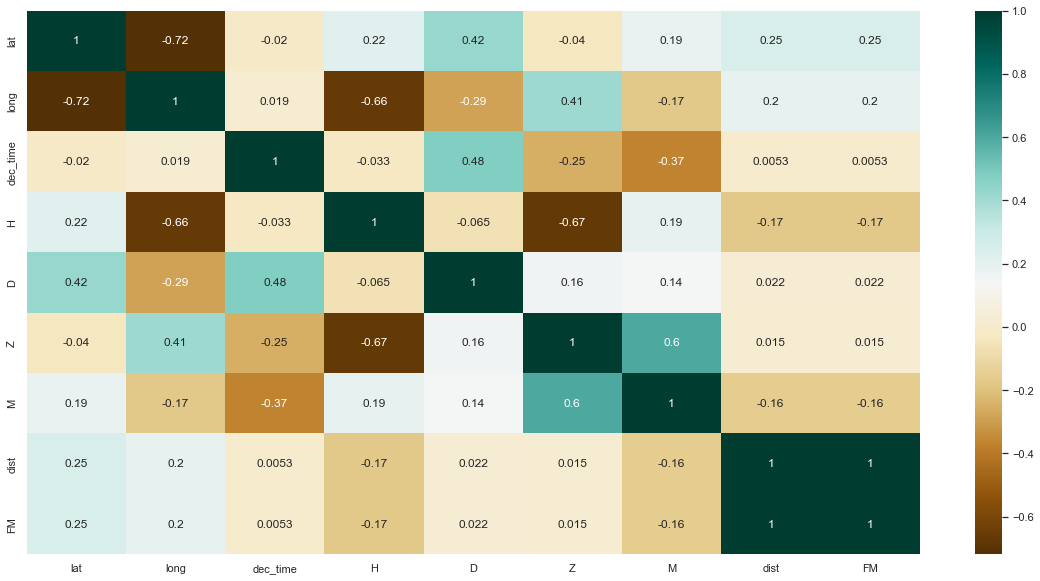

In [110]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

plt.figure(figsize=(20,10))
c= df7.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [3]:
df7 = pd.read_csv('geomag_hurricane_DORIAN.csv')

In [111]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Plotting the path of the hurricane reveals that it followed along the coast and therefore along the edge of the Azores High, which was situated inland at the time.

In [112]:
plot_crs = ccrs.LambertConformal(central_longitude = -100, central_latitude = 45)
#data coordinate reference system
data_crs = ccrs.PlateCarree()


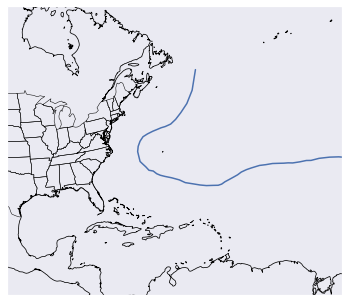

In [113]:
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(1,1,1, projection=plot_crs)

ax.set_extent([-100,-37,12,52], data_crs)
ax.coastlines('50m', edgecolor='k', linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)

ax.plot(df7['long'], df7['lat'],
       transform=data_crs)

In [114]:
#conda install cartopy

Plotting the forward motion and geomagnetic field.

In [115]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.line(df7, x = 'date', y="FM")
fig.show()

In [116]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.line(df7, x = 'date', y="M")
fig.show()

Scale all data so that it fits into a single graph.

In [117]:
# Import the library for normalization of the data
import sklearn.preprocessing as preproc

# Initialise the objects using StandardScaler() 
sc_m = preproc.minmax_scale(df7["M"])
sc_y = preproc.minmax_scale(df7["FM"])
sc_h = preproc.minmax_scale(df7["H"])
sc_d = preproc.minmax_scale(df7["D"])
sc_z = preproc.minmax_scale(df7["Z"])


In [118]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df7["date"], y=sc_m,
                    mode='lines',
                    name='M',
                    line=dict(width=0.75)))
fig.add_trace(go.Scatter(x=df7["date"], y=sc_y,
                    mode='lines',
                    name='FM',
                    line=dict(width=0.75)))

fig.show()

There appears to be a large electromagnetic anomaly occurs just before the slow down in Hurricane Dorian's forward motion.

In [119]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df7["date"], y=sc_m,
                    mode='lines',
                    name='M',
                    line=dict(width=0.75)))
fig.add_trace(go.Scatter(x=df7["date"], y=sc_h,
                    mode='lines',
                    name='H',
                    line=dict(width=0.75)))
fig.add_trace(go.Scatter(x=df7["date"], y=sc_d,
                    name='D',
                    line=dict(width=0.75)))
fig.add_trace(go.Scatter(x=df7["date"], y=sc_z,
                    mode='lines',
                    name='Z',
                    line=dict(width=0.75)))
fig.add_trace(go.Scatter(x=df7["date"], y=sc_y,
                    mode='lines',
                    name='FM',
                    line=dict(width=0.75)))

fig.show()

In [58]:
#df7.to_csv('geomag_hurricane_DORIAN.csv', index=False)